The purpose of this notebook is to analyze the movement of the daily markets with large movements

In [1]:
from pathlib import Path
import os
def load_env_vars_from_file(path: Path):
    file = path.read_text()
    for line in file.splitlines():
        if line.startswith("export"):
            var_to_value = line.split(" ")[1].split("=")
            var_ = var_to_value[0]
            value_ = var_to_value[1][1:-1]
            os.environ[var_] = value_
def set_up_prod_credentials():
    file = "../../../../scripts/prod_setup_creds.sh"
    load_env_vars_from_file(Path(file))
set_up_prod_credentials()

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt 
from data.coledb.coledb import ColeDBInterface
from exchange.interface import ExchangeInterface

db = ColeDBInterface()
e = ExchangeInterface(is_test_run=False)
def plotter():
    for ticker in Path("raw_tickers_with_large_movements.txt").read_text().splitlines():
        df = db.read_bbo_df(ticker)
        trades = list(e.get_trades(ticker))
        trade_ts = [t.created_time.timestamp() for t in trades]
        trade_price = [t.yes_price for t in trades]
        trade_quantity = [t.count for t in trades]
        trade_side = [t.taker_side for t in trades]
        plt.scatter(df.ts, df.yes_bid_price, c = "blue")
        plt.scatter(df.ts, df.yes_ask_price, c = "orange")
        plt.scatter(trade_ts, trade_price, c="green")

        for i in range(len(trade_ts)):
            plt.text(
                trade_ts[i],
                trade_price[i] * 1.001,
                f"{trade_side[i].value} {trade_quantity[i]}",
                fontsize=9,
            )
        for i in range(len(df)):
            plt.text(
                df.iloc[i].ts,
                df.iloc[i].yes_ask_price,
                f"{df.iloc[i].yes_ask_qty}",
                fontsize=9,
            )
            plt.text(
                df.iloc[i].ts,
                df.iloc[i].yes_bid_price,
                f"{df.iloc[i].yes_bid_qty}",
                fontsize=9,
            )
        plt.show()
        yield
        


In [12]:
gen = plotter()

10 10


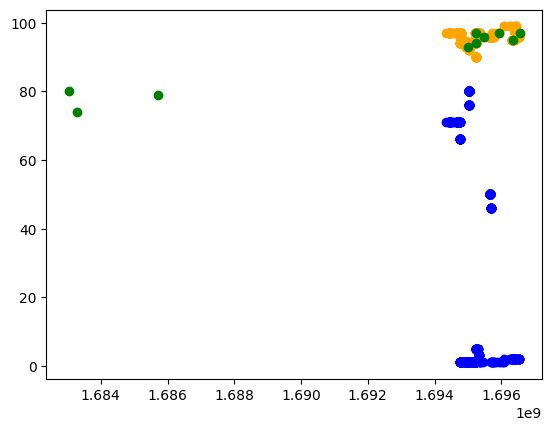

In [13]:
next(gen)